# Visit With Us Wellness Package Project
### Project 4
Aditya Ohrie

### Background Information
1. Visit With Us is a travel agency which specializes in travel packages for customers.
2. To achieve breadth of the market, the company has offered 5 packages to date to capture demands from different customer niches- Basic, Standard, Deluxe, Super Deluxe, King
3. With a rise is holistic tourism, the company has looked to introducing Wellness Tourism a spackage to capture this segment of customer demand
4. However, with large marketing costs associated with random customer outreach, the company is looking to optimize their effrots for resource maximization when it comes to the Wellness Package.

### Objectives
1. Identifying the key marget segments for the Wellness Package offered by Visit With Us
2. Using customer data identify customers more likely to purchase packages so that marketing resources can used optimally

## Contents
1. Installing Python Packages
2. Dataset Exploration
3. Feature Exploration
4. Exploratory Data Analysis
5. Bivariate Feature Analysis and Relationship Exploration
6. Data Pre-processing
7. Model Evaluation Criterion
8. Desicion Tree, Bagging and Random Forest
9. Boosting- ADABoost, Gradient Boosting and XGBoost
10. Key Takeaways and Actionable Insights

In [1]:
import numpy as np # NUMPY is a package for numerical and arthematic operators
import pandas as pd # PANDAS helps with dataframe creation, editing and analysis
import matplotlib.pyplot as plt # MATPLOTLIB is a data vizualization package to create a multitude of graphs
import seaborn as sns # SEABORN is an extremely powerful vizualization tool that sits on top of MATPLOTLIB 
sns.set(color_codes=True) # Adds color palletes to graphs to make interpretation easier
%matplotlib inline 
# setting matplotlib graphs to be shown in the notebook rather than just be saved as objects
import warnings
warnings.filterwarnings('ignore')# hiding all warnings
pd.set_option('display.max_columns', None) # Allows us to see all columns of the dataset during exploration
pd.set_option('display.max_rows', 200) #Setting this allows us to see the first two hundred rows of the dataset
df = pd.read_excel("Tourism.xlsx", index_col=0, sheet_name='Tourism') # uploading the dataset and storing it as df
from sklearn.linear_model import LinearRegression #allows us to run linear regressions
from sklearn.model_selection import train_test_split # allows us to rendomly split data into train and test groups
from sklearn.metrics import mean_absolute_error#allows us to quickly find the mean absolute error
from sklearn.metrics import mean_squared_error#allows us to quickly find the mean squared error


## Dataset Exploration

### Dataset Shape

In [2]:
df.shape

(4888, 19)

**Observation**

There are 4888 customer data rows and 19 features

### Sample Data

In [3]:
np.random.seed(8)
df.sample(n=5)#picks five rows at random

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
202929,0,28.0,Self Enquiry,1,13.0,Small Business,Female,4,5.0,Basic,3.0,Married,2.0,0,2,1,2.0,Executive,20865.0
203961,0,38.0,Self Enquiry,1,26.0,Salaried,Male,4,4.0,Basic,4.0,Married,6.0,0,4,0,2.0,Executive,21700.0
203583,0,33.0,Self Enquiry,1,12.0,Salaried,Female,3,2.0,Basic,3.0,Married,5.0,0,5,1,2.0,Executive,21990.0
201070,0,28.0,Company Invited,3,NaN,Salaried,Male,2,3.0,Deluxe,5.0,Single,1.0,0,3,1,1.0,Manager,19898.0
200547,1,42.0,Company Invited,1,25.0,Small Business,Male,2,2.0,Basic,3.0,Married,7.0,1,3,1,1.0,Executive,17759.0


**Observations**
1. There seem to two numerical and seventeen categorical features
2. Our model will be quite complex later because of the large number of dummies that will have to be created based on these categorical variables

## Feature Exploration

### Feature Descriptions

|Feature|Description|
|---:|---:|
|**CustomerID**|Customer Identification Number|
|**ProdTaken**|Whether the customer purchased the package|
|**Age**|Customer Age in Years|
|**TypeofContact**|How was the customer contacted?|
|**CityTier**|Type of city for customer|
|**DurationOfPitch**|Duration of Sales Pitch|
|**Occupation**|Occupation of Customer|
|**Gender**|Gender of Customer|
|**NumberOfPersonVisiting**|Total number of people visiting on the trip|
|**NumberOfFolowUps**|How many follow ups were conducted by salespersons|
|**ProductPitched**|Type of Product pitched by Salesperson|
|**PreferredPropertyStar**|Type of Property customer prefers|
|**MaritalStatus**|Marital Status of Customer|
|**NumberOfTrips**|Average number of Trips taken by a customer in a year|
|**Passport**|Whether the customer has a passport|
|**PitchSatisfactionScore**|How Satisfied was the customer by the Sales Pitch|
|**OwnCar**|Does the customer own a car|
|**NumberOfChildrenVisiting**|How many children will be on the trip|
|**Designation**|Current Job Title of Customer|
|**MonthlyIncome**|Monthly income of customer|

### Feature Types

In [4]:
df.dtypes#returns a table of feature and feature types

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

**Observations**

1. There are 6 object features and 13 numeric features
2. Even though most of the categorical features are stored in numeric format, we will change them into categories when we get dummies for these features

### Checking for Missing Values

In [5]:
df.isnull().sum().sort_values(ascending=False)#sums missing values by column and reports results in descending order

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

**Observations**
1. There are missing values in 7 features which we will impute using either frequency or mean/median methods

## Exploratory Data Analysis

### Summary Statistics

In [6]:
df.describe().T#shows summary statistics of all numeric features in a transposed manner

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


**Observations**
1. The median monthly income for customers is 22347
2. The median number of people on a trip is 3, possibly in line with parents and one child as the median number of children on a trip is also one
3. There are outliers for both Duration of Pitch and Number of Trips which must be inspected further during univariate analysis and acceptable outlier treatment must be applied if deemed neccesary
4. The average pitch satisfaction score is 3.07 and efforts should be made to improve the pitch.
5. 18% of all customers booked a package
6. The median quality of property customers prefer is a 4 star implying customers have higher preferences
7. On average, customers go on 3.26 trips a year and hence converting a lead could amount to recurring revenue

### Observations on Key Features

### Creating Box and Barplots

In [7]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):#defining function for histogram and boxplot in one figure
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Age

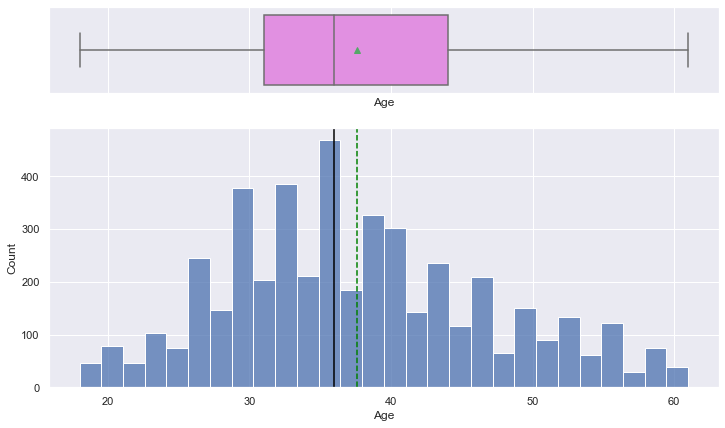

In [8]:
histogram_boxplot(df, "Age")

**Observations**
1. The median age is around 38
2. The distribution has a slight right skew which is in line with very few individuals going on holidays on their own before the age of 18

### Duration of Pitch

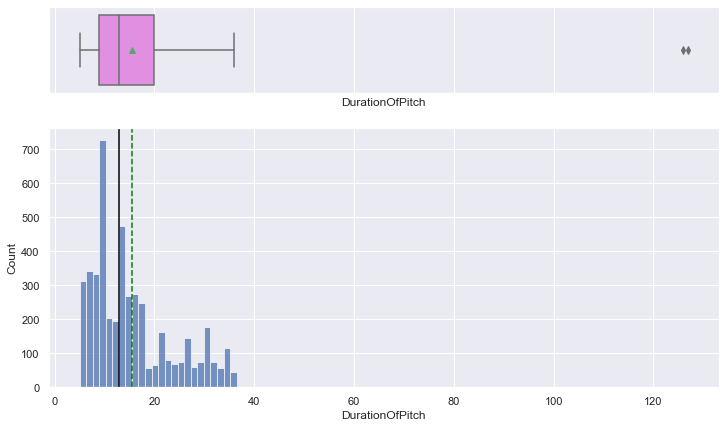

In [9]:

histogram_boxplot(df, "DurationOfPitch")

**Observations**
1. There are definite outliers at 126 and 127, however, we will not be applying any outlier treatment on these as they were real scenarios where the customer needed more information 
2. The highest frequency for pitch duration is approximately 10, however, there is a definite right skew to the distribution.
3. The company should focus on standardizing the pitch to a duration that is most effective offering a baseline experience for all prospective customers

### Number of Person Visiting

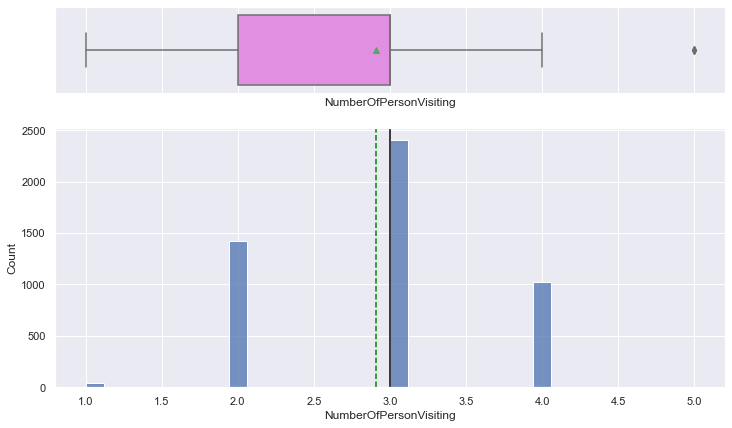

In [10]:
histogram_boxplot(df, "NumberOfPersonVisiting")

**Observations**
1. While the median number of guests is slightly less than the mean of 3, we can infer that most guests come as a couple or family. 

### Monthly Income

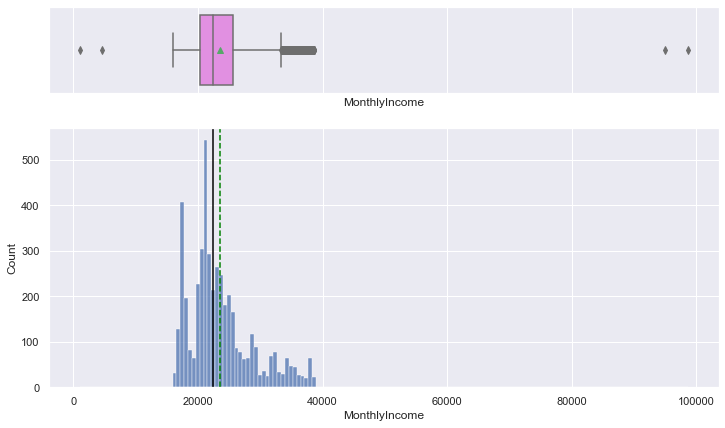

In [11]:
histogram_boxplot(df, "MonthlyIncome")

**Observations**
1. The median monthly income is around \\$22,000, which is considerably higher than the national American average of \\$4200
2. This implies that the prospective customer base for Visit With Us is in a significantly better financial position and has the disposable income to focus on Welness related experiences

### Gender

In [ ]:
sns.countplot(data=df,x="Gender")#gives a frequency barplot

**Observations**
1. There is an error when categorizing gender as some Female prospects have been incorrectly labelled as Fe Male and must recategorized before modelling
2. There are significantly more male prospects than female prospects

In [13]:
df["Gender"].value_counts()#gets frequency of unique values in feature

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

**Observations**
1. Around 155 Women have been incorrectly categorized as "Fe Male"

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

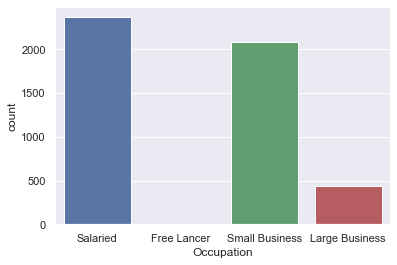

In [14]:
sns.countplot(data=df,x="Occupation")

**Observations**
1. Almost half of the prospective customers are salaried while the other half are divided significantly into Small Business and Large Business Owners
2. There seem to be a few freelancers which we will investigate now:

In [15]:
df["Occupation"].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

**Observations**
1. While there are only 2 freelancers, we cannot ignore this segment of customers as they may have different preferences

### Product Pitched

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

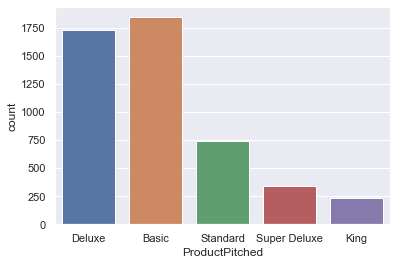

In [16]:
sns.countplot(data=df,x="ProductPitched")

**Observations**
1. The most frequent product pitched is the Basic Holiday Package
2. There seems to be an underutilization of the standard package with a majority of customers being pitched either the Deluxe or Basic package. 
3. Other packages follow the intuition that more premium products are pitched less often 

### Marital Status

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

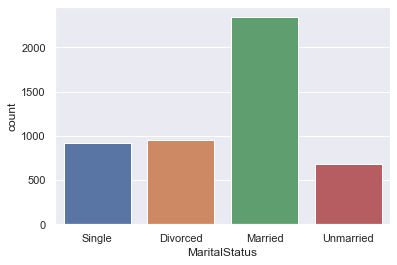

In [17]:
sns.countplot(data=df,x="MaritalStatus")

**Observations**
1. Over 50% of customers are married and this seems to be the key demographic for Visit With Us
2. Single and Divorced customers seem to be the next two similarly placed demographics

## Bivariate Feature Analysis and Relationship Exploration

### General Bivariate Analysis for Numeric Variables

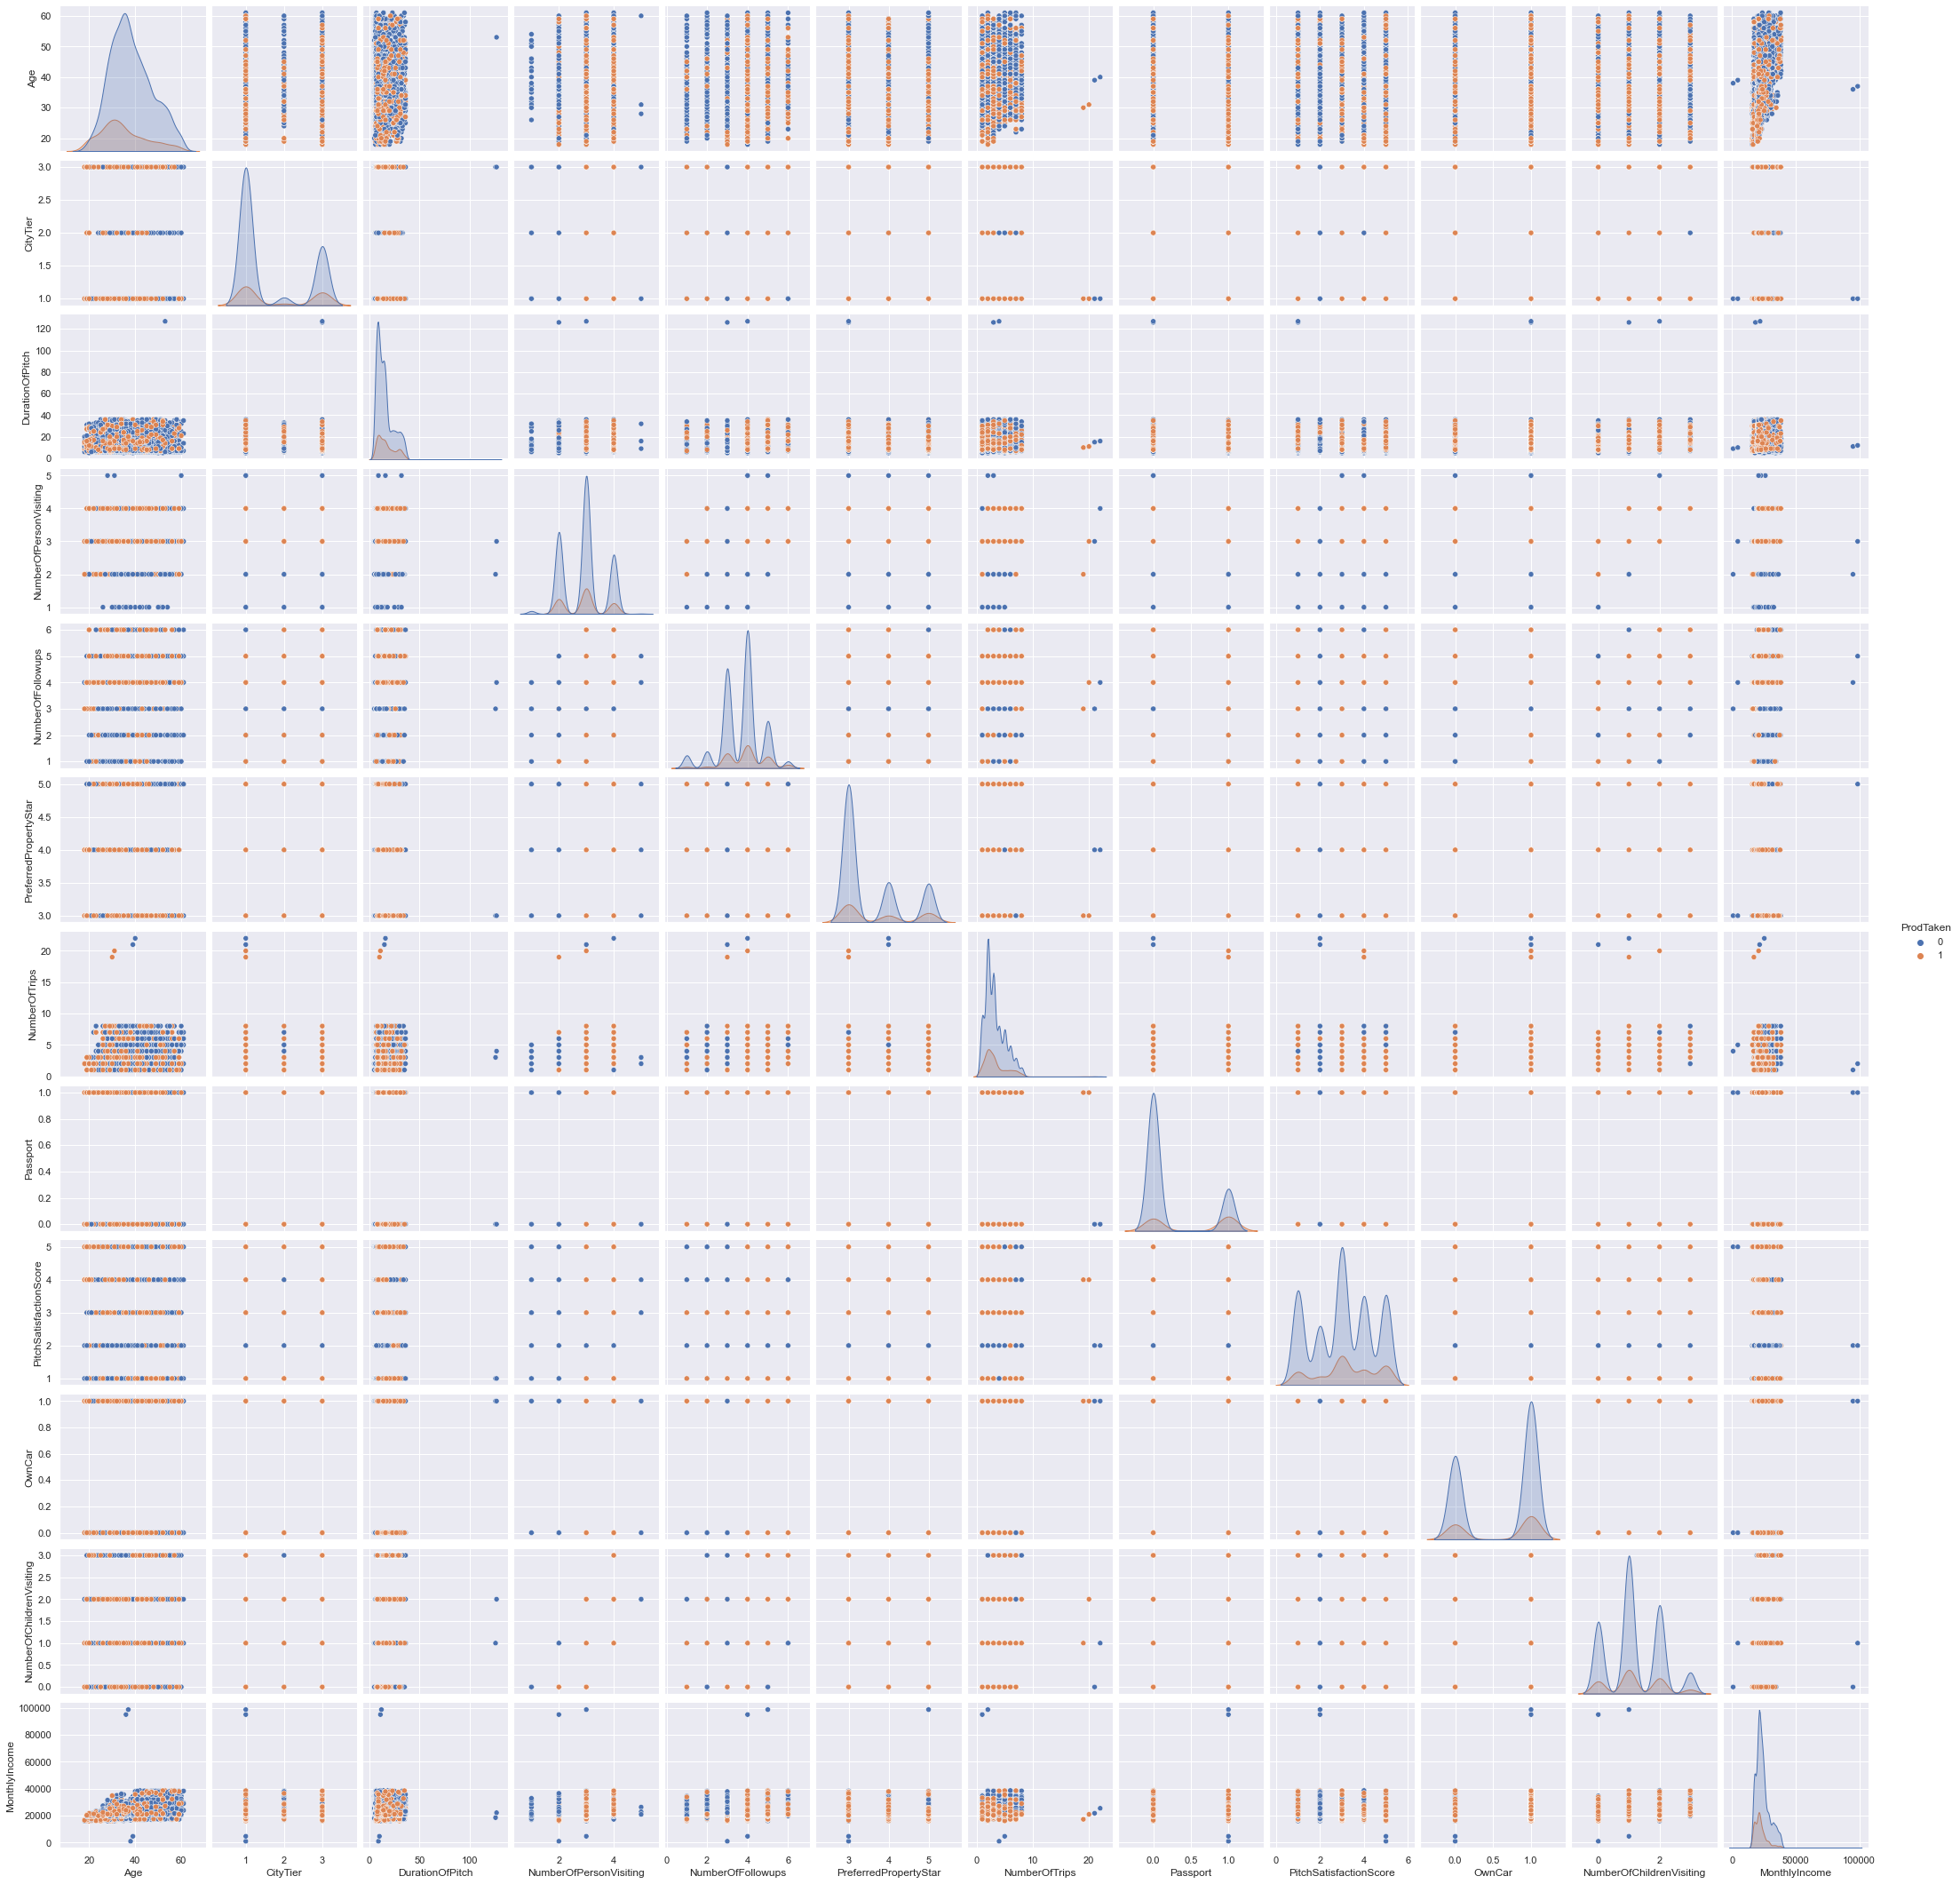

In [18]:
sns.pairplot(data=df,hue="ProdTaken")#convieniently creates histograms and scatterplots for each pair of numeric features

**Observations**
1. Age and Monthly income seem to be slightly positively correlated
2. Due to a high number of categorical variables, there is not a large number of clear relationships we can visually see and hence we should look to the heatmap to identify any key relationships

### Product Taken vs. Type of Contact

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

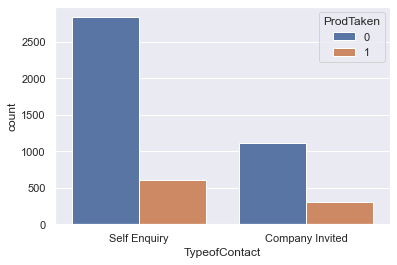

In [19]:
sns.countplot(data=df,x="TypeofContact",hue="ProdTaken")

**Observations**
1. Most customers seem to be inquring with Visit With Us themselves.
2. Lead conversion seems to be marginally higher in the comapny-invited channell when compared to Self-Enquiry.
3. More focus should be placed on driving conversion for Self-Inquiry leads

### Designations vs. Preferred Property Star

<AxesSubplot:xlabel='Designation', ylabel='count'>

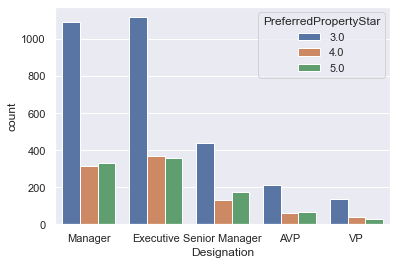

In [20]:
sns.countplot(data=df,x="Designation",hue="PreferredPropertyStar")

**Observations**
1. The most popular property star seems to be a 3 star hotel across all designation levels.
2. The most frequent customers are Manager, Senior Manager and Exectuive
3. Between 4 and 5 star properties, 5 star properties are marginally preferred over 4 star properties- pointing to a non linear relationship in customer preferences.

### Pitch Satisfaction vs. Product Taken

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

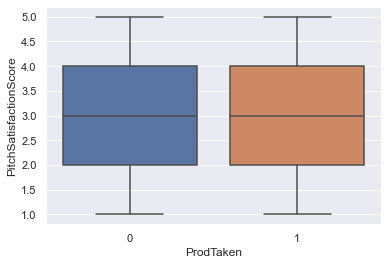

In [21]:
sns.boxplot(data=df,x="ProdTaken",y="PitchSatisfactionScore")

**Observations**
1. There seems to be no distinct difference in the pitch satisfaction scores of those who took packages and those who didn't

### Designation vs. Trips Taken with Passport

<AxesSubplot:xlabel='Designation', ylabel='NumberOfTrips'>

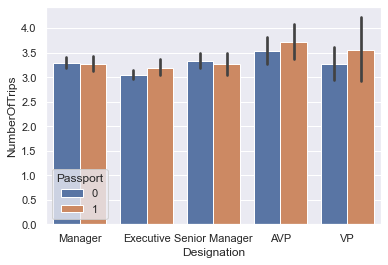

In [23]:
sns.barplot(data=df,x="Designation",y="NumberOfTrips",hue="Passport")

**Observations**
1. As seniority increases, the ratio of passport holders seems to increase
2. This impliesthat international packages should be pitched to customers with a higher job designations

### Pitch Satisfaction vs. Pitch Duration

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='DurationOfPitch'>

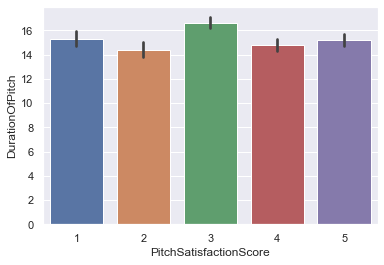

In [24]:
sns.barplot(data=df,x="PitchSatisfactionScore",y="DurationOfPitch")

**Observations**
1. There seems to be no clear relationship between duration and satisfaction of the pitch.
2. This implies further relationships should be explored to find key characteristics of a satisfactory pitch and be implemented in SOPs for a standardized customer experience

### Trips per Year vs. Number of People Visiting

<AxesSubplot:xlabel='NumberOfTrips', ylabel='NumberOfPersonVisiting'>

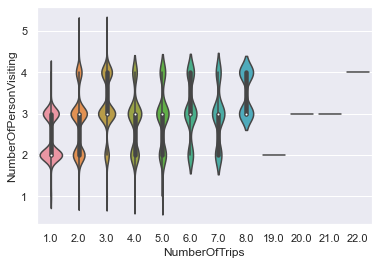

In [25]:
sns.violinplot(data=df,x="NumberOfTrips",y="NumberOfPersonVisiting")

**Observations**
1. As number of trips per year go up there is a marginal uptick in number of people on the trip

### Correlation Matrix

<AxesSubplot:>

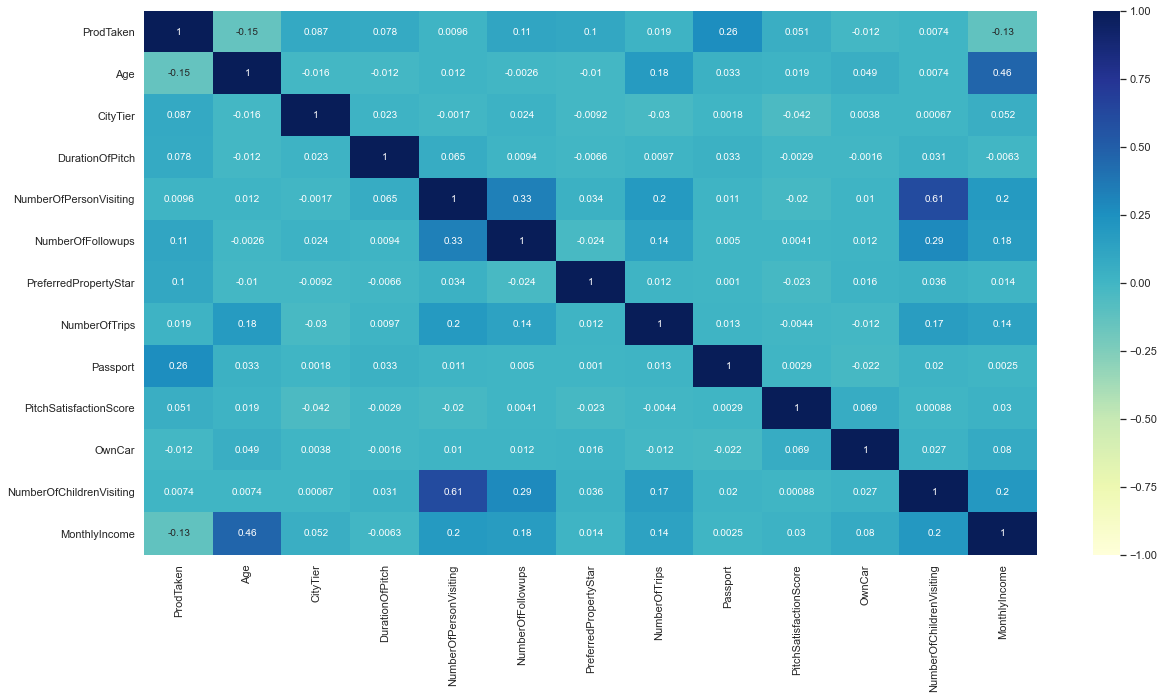

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="YlGnBu")#creates correlation matrix for all numeric variables

**Observations**
1. There are no extremely strong linear relationships between the numeric variables
2. NumberofChildren and number of Person Visiting seem to be positively correlated implying that larger groups are usually families with children
3. Age and monthly income seem to be positively correlated and hence older customers seem to have higher incomes and should be pitched more luxurious packages
4. Age and product taken are weakly negatively correlated implying as age decreases the chance of conversion is higher
5. Passport and Product Taken seem to be positively correlated and having a passport could increase the likelihood of package purchase

### Final Observations
1. The taget demopgraphic for Visit With Us is families with children.
2. Most customers of Visit With Us are Salaried
3. Age and monthly income seem to be positively correlated and hence older customers seem to have higher incomes and should be pitched more luxurious packages
4. Packages should be pitched to younger customers as they are more likely to purchase
5. Lead conversion in the Self-Enquiry channel should be further analysed
6. Customers with Passports should be targeted as they are more likely to purchase packages
7. People with families/ groups of people seem to take more trips and should be targeted for a higher customer return rate

## Data Pre-processing

### Missing Value Treatment
For categorical variables, we will be imputing missing values with the most commonly found observation(mode), while for continous variables we will use either median or mean

In [27]:
df.isnull().sum().sort_values(ascending=False)#sorts and shows features with missing values

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [28]:
medianpitch=df["DurationOfPitch"].median()#finds median of feature
medianincome=df["MonthlyIncome"].median()
medianage=df["Age"].median()
mediantrips=df["NumberOfTrips"].median()
medianchildren=df["NumberOfChildrenVisiting"].median()
medianfollow=df["NumberOfFollowups"].median()
df["DurationOfPitch"]=df["DurationOfPitch"].fillna(medianpitch)#fills missing values with median
df["MonthlyIncome"]=df["MonthlyIncome"].fillna(medianincome)
df["Age"]=df["Age"].fillna(medianage)
df["NumberOfTrips"]=df["NumberOfTrips"].fillna(mediantrips)
df["NumberOfChildrenVisiting"]=df["NumberOfChildrenVisiting"].fillna(medianchildren)
df["NumberOfFollowups"]=df["NumberOfFollowups"].fillna(medianfollow)

In [29]:
modestar=df["PreferredPropertyStar"].mode()#finds mode of feature
modestar

0    3.0
dtype: float64

In [30]:
df["PreferredPropertyStar"]=df["PreferredPropertyStar"].fillna(3)#filling missing values with mode calculated above

In [31]:
df["TypeofContact"].value_counts()#finding most common category for feature

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

As Self Inquiry is the most common category, we will replace the missing values with it

In [32]:
df["TypeofContact"]=df["TypeofContact"].fillna("Self Enquiry")#filling most common category for missing values

In [33]:
df.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

Since there are no more **missing values**, we can go ahead with fixing misentered data

### Gender Data Matching
As Female is entered in two ways, let us fix it for when we create dummies

In [34]:
df["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [35]:
df["Gender"].replace({"Fe Male":"Female"},inplace=True)
df["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

### Getting Dummies

In [36]:
df= pd.get_dummies(df, columns=['TypeofContact','Gender','CityTier','Occupation','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','Designation'],drop_first=True)#drops first category and gets dummies for all required features

In [37]:
df.shape

(4888, 53)

There are now **53 features**. Let us take a look at a sample of the data

In [38]:
np.random.seed(8)
df.sample(n=5)#picks five rows at random

,ProdTaken,Age,DurationOfPitch,Passport,OwnCar,MonthlyIncome,TypeofContact_Self Enquiry,Gender_Male,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,NumberOfFollowups_2.0,NumberOfFollowups_3.0,NumberOfFollowups_4.0,NumberOfFollowups_5.0,NumberOfFollowups_6.0,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,NumberOfTrips_2.0,NumberOfTrips_3.0,NumberOfTrips_4.0,NumberOfTrips_5.0,NumberOfTrips_6.0,NumberOfTrips_7.0,NumberOfTrips_8.0,NumberOfTrips_19.0,NumberOfTrips_20.0,NumberOfTrips_21.0,NumberOfTrips_22.0,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,NumberOfChildrenVisiting_1.0,NumberOfChildrenVisiting_2.0,NumberOfChildrenVisiting_3.0,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202929,0,28.0,13.0,0,1,20865.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
203961,0,38.0,26.0,0,0,21700.0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
203583,0,33.0,12.0,0,1,21990.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
201070,0,28.0,13.0,0,1,19898.0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
200547,1,42.0,25.0,1,1,17759.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


### Checking Ratio of Trip takers in Original Data

In [39]:
buy_true = len(df.loc[df['ProdTaken'] == True])
buy_false = len(df.loc[df['ProdTaken'] == False])
print("Number of Package Purchasers: {0} ({1:2.2f}%)".format(buy_true, (buy_true / (buy_true + buy_false)) * 100 ))

Number of Package Purchasers: 920 (18.82%)


**Observation**
1. The original data set has a lead conversion rate of 18.82%

### Splitting Data into Training and Testing Data

### Splitting Data into Training and Testing Sets

In [40]:
X=df.drop(["ProdTaken"],axis=1)
Y=df[["ProdTaken"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=646)#splitting data into training and testing sets with training set set to 30% of data

### Checking Split of Data

In [41]:
print("Amount of data in training set {0:0.2f}%".format((len(X_train)/len(df.index)) * 100))
print("Amount of data in test set {0:0.2f}%".format((len(X_test)/len(df.index)) * 100))

Amount of data in training set 69.99%
Amount of data in test set 30.01%


**Observation**

The data is almost perfectly split into training and Testing Set

### Checking Package Purchasers in Training and Test Set

In [42]:
buy_true_train = len(y_train.loc[df['ProdTaken'] == True])
buy_false_train = len(y_train.loc[df['ProdTaken'] == False])
buy_true_test = len(y_test.loc[df['ProdTaken'] == True])
buy_false_test = len(y_test.loc[df['ProdTaken'] == False])
print("Number of Package Purchasers: {0} ({1:2.2f}%)".format(buy_true, (buy_true / (buy_true + buy_false)) * 100 ))
print("Number of Package Purchasers in Training set: {0} ({1:2.2f}%)".format(buy_true_train, (buy_true_train / (buy_true_train + buy_false_train)) * 100 ))
print("Number of Package Purchasers in Testing set: {0} ({1:2.2f}%)".format(buy_true_test, (buy_true_test / (buy_true_test + buy_false_test)) * 100 ))

Number of Package Purchasers: 920 (18.82%)
Number of Package Purchasers in Training set: 649 (18.97%)
Number of Package Purchasers in Testing set: 271 (18.47%)


**Observations**
1. Both Triaing and testing data have almost equal amounts of purchasing customers

## Model Evaluation Criterion

#### The Model can predict wrongly in the following ways:
1. Predicting someone who would buy the package as a non-buyer
2. Predicting someone who would not buy the package as a buyer

#### Which misprediction is more important to us?
1. By mispredicting a buyer as a non-buyer, we will miss out on the potential revenue gained by correctly advertising to the customer
2. By mispredicting a non-buyer as a buyer, we will increase our marketing costs and will reduce our overall profit margin

Hence, we should use the F1 score which takes both types of errors into account and maximizing the F1-score will allow us to minimize both types or errors

Let us now define functions to help with model evaluation and to create the **Confusion Matrix**

In [43]:
# importing libraries for different ensemble classifiers and desicion tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# importing crossvalidation library and metrics to evaluate model performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [44]:
def model_performance_classification_sklearn(model, predictors, target):#function for getting metrics from sklearn metrics
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [45]:
def confusion_matrix_sklearn(model, predictors, target):#building confusion matrix
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree, Bagging and Random Forest
Let us first create a Desicion Tree with weights given to the class of 0.81 and 0.19

In [46]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=646)#fitting model
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=646)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.882754  0.723247   0.668942  0.695035


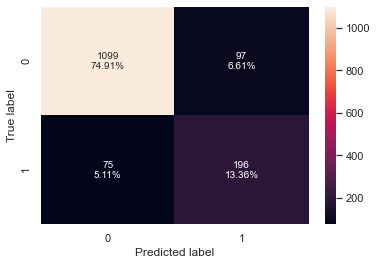

In [47]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree,X_train,y_train)#calculating model metrics
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(dtree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree, X_test, y_test)

**Observations**
1. The decision tree has an overfit problem consistent with unchecked decision trees which grow till each observation has been correctly identified in the training set
2. Compared to the training set the model performs significantly worse on the testing set.
3. While the model is able to predict 196 customers who would buy the package, it predicts 75 purchasers as those who wouldnt and 97 non-purchasers as purchasers
4. On the testing set, the F1 score is only about 70% when compared to the perfect 100% on the training set

### Bagging Classifier

In [48]:
bagging = BaggingClassifier(random_state=646)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.993861  0.970724   0.996835  0.983607
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.904567  0.601476   0.835897  0.699571


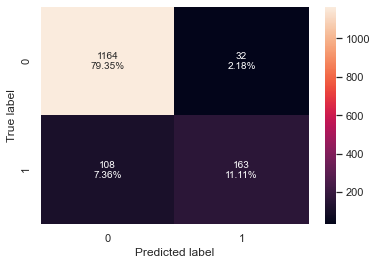

In [49]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging,X_train,y_train)
print("Training performance:\n",bagging_model_train_perf)
bagging_model_test_perf=model_performance_classification_sklearn(bagging,X_test,y_test)
print("Testing performance:\n",bagging_model_test_perf)
confusion_matrix_sklearn(bagging, X_test, y_test)

**Observations**
1. The bagging classifier did better at eliminating False Positives than the decision tree- however, it did worse on removing False Negative
2. The model was less but still significantly overfit on the training data when compared to the decision  tree
3. The F1 score improved marginally, however hyperparameter tuning is needed to reduce overfitting on the training data and improve testing data performance.

### Random Forest

In [50]:
forest = RandomForestClassifier(random_state=646)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=646)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907294  0.549815    0.91411  0.686636


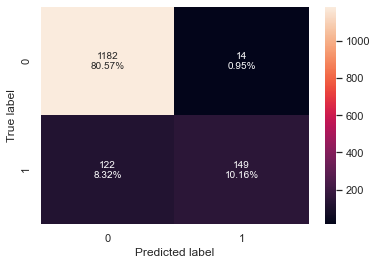

In [51]:
forest_model_train_perf=model_performance_classification_sklearn(forest,X_train,y_train)
print("Training performance:\n",forest_model_train_perf)
forest_model_test_perf=model_performance_classification_sklearn(forest,X_test,y_test)
print("Testing performance:\n",forest_model_test_perf)
confusion_matrix_sklearn(forest, X_test, y_test)

**Observations**
1. As a random forest is just a collection of week decision trees, it is prone to overfitting as seen in the perfect fit of the training set.
2. The model did the best out of all three in terms of eliminating false positives
3. However, the random forest performed the worst out of all three models in terms of F1 score only achieving 68% 

### Hyper Parameter Tuning

#### Tuning Desicion Tree

In [52]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=646)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=646)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.722596  0.8151   0.389543  0.527155
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.694615  0.712177   0.342806  0.46283


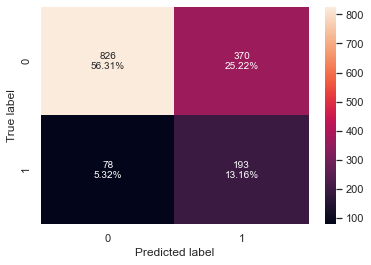

In [53]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)


**Observations**
1. The tuned decision tree significantly reduced overfitting and brought the training scores closer to testing data scores.
2. However, the metrics fell considerably and only about 69.5% of all observations were correctly classified by the model.
3. The F1 score fell from about 70% to 46% after hyperparameter tuning

#### Tuning Bagging Classifier

In [54]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=646)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998459        1.0  0.999229
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.920927  0.656827   0.885572  0.754237


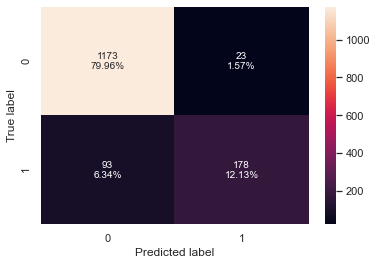

In [55]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

**Observations**
1. The bagging hypertuned model has caused overfitting on the training set
2. The bagging classifier however had a close accuracy to the training set.
3. It has the best F1 score for all the models upto this point reaching over 75% on the testing data

#### Tuning Random Forest

In [56]:
forest_estimator = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=646)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(forest_estimator, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
forest_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
forest_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=9,
                       max_features=0.6, max_samples=0.9999999999999999,
                       min_impurity_decrease=0.0001, n_estimators=70,
                       random_state=646)

Training performance:
    Accuracy    Recall  Precision       F1
0   0.96083  0.924499   0.875912  0.89955
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871847  0.634686   0.659004  0.646617


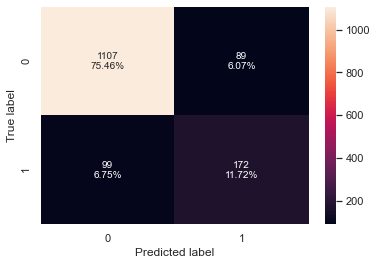

In [57]:
#Calculating different metrics
forest_estimator_model_train_perf=model_performance_classification_sklearn(forest_estimator,X_train,y_train)
print("Training performance:\n",forest_estimator_model_train_perf)
forest_estimator_model_test_perf=model_performance_classification_sklearn(forest_estimator,X_test,y_test)
print("Testing performance:\n",forest_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(forest_estimator, X_test, y_test)

**Observations**
1. The hyperparameter tuning was able to reduce some of the overfitting from the initial model
2. However, as in the case of the decision tree, the F1 score fell to 64% in this case

### Comparing all the models

#### Training Model Performance

In [58]:
bagging_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T,forest_model_train_perf.T,
dtree_estimator_model_train_perf.T, bagging_estimator_tuned_model_train_perf.T,
     forest_estimator_model_train_perf.T],
    axis=1,
)
bagging_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
bagging_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.993861,1.0,0.722596,0.999708,0.960830
Recall,1.0,0.970724,1.0,0.815100,0.998459,0.924499
Precision,1.0,0.996835,1.0,0.389543,1.000000,0.875912
F1,1.0,0.983607,1.0,0.527155,0.999229,0.899550


**Observations**
1. Most of the models were overfit on the training data
2. The decision tree estimator had the lowest amount of overfitting

#### Testing Model Performance

In [70]:
bagging_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T,forest_model_test_perf.T,
dtree_estimator_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T,
     forest_estimator_model_test_perf.T],
    axis=1,
)
bagging_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
bagging_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.882754,0.904567,0.907294,0.694615,0.920927,0.871847
Recall,0.723247,0.601476,0.549815,0.712177,0.656827,0.634686
Precision,0.668942,0.835897,0.914110,0.342806,0.885572,0.659004
F1,0.695035,0.699571,0.686636,0.462830,0.754237,0.646617


1. The bagging estimator did the best on Accuracy and F1 while the decision tree did the best on recall and the Random Forest classifier did the best on Precision
2. Let us know look at the feature importances for the tuned random forest estimator

### Feature Importance

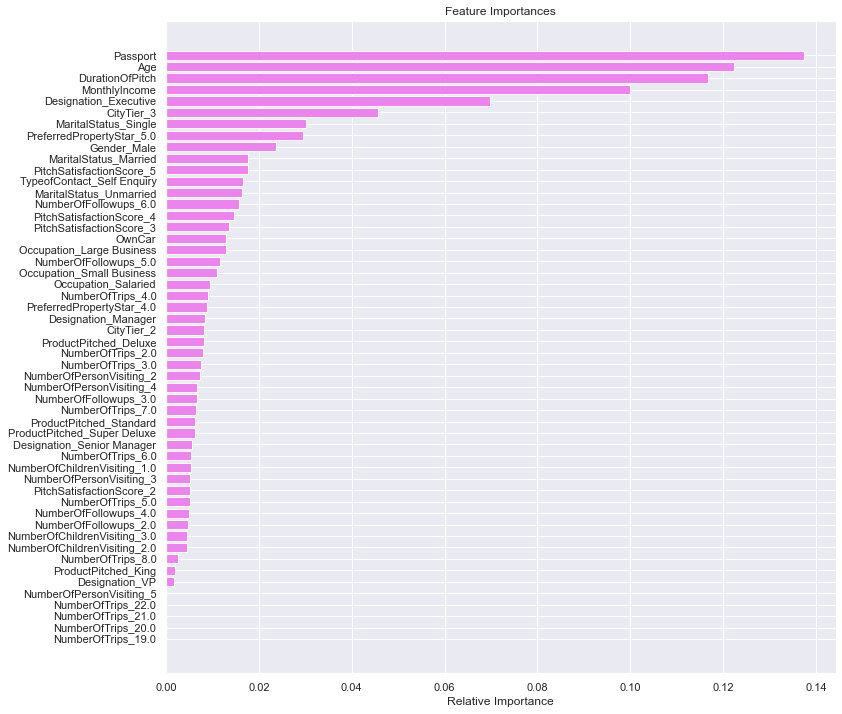

In [75]:
feature_names = X_train.columns
importances = forest_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
1. Having a passport has the highest importance when it comes to purchasing a package
2. Other important features include Age, Duration of Pitch, Monthly income, Executives and Tier 3 cities

## Boosting 

#### ADA Boost

In [60]:
ada = AdaBoostClassifier(random_state=646)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=646)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.857059  0.3698       0.75  0.495356
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.840491  0.324723   0.633094  0.429268


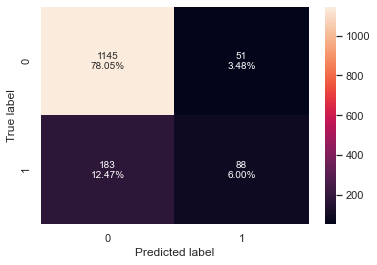

In [61]:
#Calculating different metrics
ada_model_train_perf=model_performance_classification_sklearn(ada,X_train,y_train)
print("Training performance:\n",ada_model_train_perf)
ada_model_test_perf=model_performance_classification_sklearn(ada,X_test,y_test)
print("Testing performance:\n",ada_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(ada, X_test, y_test)

**Observations**
1. The model did well in terms of accuracy on both the testing and training set
2. The model was not overfit on the training set when compared to testing data
3. However, the F1 score was too low on both the training and testing sets

#### ADA Boost Tuning

In [63]:
ada_tuned = AdaBoostClassifier(random_state=646)#choosing classifier

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=646),DecisionTreeClassifier(max_depth=2, random_state=646),DecisionTreeClassifier(max_depth=3, random_state=646)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}#trying parameters

acc_scorer = metrics.make_scorer(metrics.f1_score)#setting metric

grid_obj = GridSearchCV(ada_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)#running grid search
ada_tuned = grid_obj.best_estimator_

ada_tuned.fit(X_train, y_train)#fitting algorithm

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=646),
                   learning_rate=1.1, n_estimators=90, random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.983923  0.939908   0.974441  0.956863
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.875937  0.594096   0.690987  0.638889


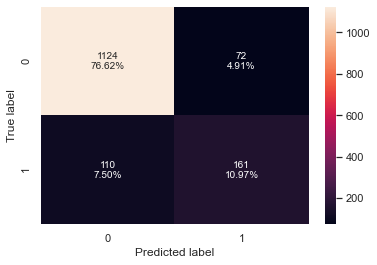

In [86]:
#Calculating different metrics
ada_tuned_model_train_perf=model_performance_classification_sklearn(ada_tuned,X_train,y_train)
print("Training performance:\n",ada_tuned_model_train_perf)
ada_tuned_model_test_perf=model_performance_classification_sklearn(ada_tuned,X_test,y_test)
print("Testing performance:\n",ada_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned, X_test, y_test)

**Observations**
1. The model did significantly better in terms of F1 score on both training and testing data
2. However, the model is showing signs of overfitting with a disparity of model performance metrics between the training and testing data

#### Gradient Boosting

In [65]:
gradient = GradientBoostingClassifier(random_state=646)
gradient.fit(X_train,y_train)

GradientBoostingClassifier(random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.890675  0.497689    0.87062  0.633333
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.865712  0.383764   0.776119  0.51358


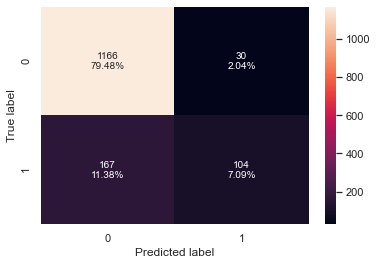

In [66]:
#Calculating different metrics
gradient_model_train_perf=model_performance_classification_sklearn(gradient,X_train,y_train)
print("Training performance:\n",gradient_model_train_perf)
gradient_model_test_perf=model_performance_classification_sklearn(gradient,X_test,y_test)
print("Testing performance:\n",gradient_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(gradient, X_test, y_test)

**Observations**
1. The model did well in capture a large amount of data without noise leading to a lack of overfitting
2. However, it performed badly in terms of F1-score only getting about 51%

#### Tuned Gradient Boosting

In [82]:
# Choose the type of classifier. 
gradient_tuned = GradientBoostingClassifier(random_state=646)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gradient_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gradient_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradient_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=250, random_state=646,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.923707  0.639445   0.938914  0.76077
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.884117  0.476015   0.821656  0.602804


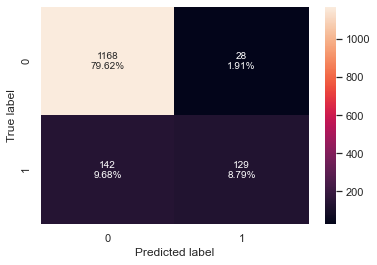

In [91]:
#Calculating different metrics
gradient_tuned_model_train_perf=model_performance_classification_sklearn(gradient_tuned,X_train,y_train)
print("Training performance:\n",gradient_tuned_model_train_perf)
gradient_tuned_model_test_perf=model_performance_classification_sklearn(gradient_tuned,X_test,y_test)
print("Testing performance:\n",gradient_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(gradient_tuned, X_test, y_test)

**Observations**
1. The model had higher precision for both training and testing sets
2. While the F1-score increased, it was still only about 60% for the testing data

#### Stacking Classifier

In [84]:
estimators = [('Random Forest',forest_estimator), ('ADA boost',gradient_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = ada_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=9,
                                                       max_features=0.6,
                                                       max_samples=0.9999999999999999,
                                                       min_impurity_decrease=0.0001,
                                                       n_estimators=70,
                                                       random_state=646)),
                               ('ADA boost',
                                GradientBoostingClassifier(max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=646,
                                                          

Training performance:
    Accuracy    Recall  Precision        F1
0  0.931307  0.882897   0.782787  0.829833
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861622  0.704797    0.60828  0.652991


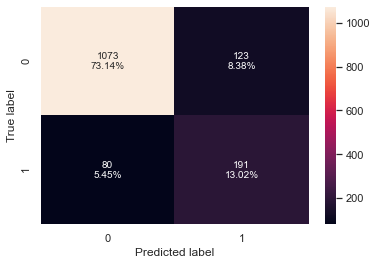

In [85]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

**Observations**
1. The stacking estimator performed better on F1 scores than both the tuned gradient boost and ADA boost
2. however, it still underperformed when compared to the tuned Bagging estimator


## Conclusions

1. The tuned bagging estimator performed the best in terms of F1 score for the testing data with a score of 75%
2. Having a passport was found to be the most important factor in purchasing a package
3. Having an age less than 31.5 was found to be an important factor and hence Visit With Us should target those in this age range
4. Customers with a designation of executive were found to be an important factor in purchasing packages and the company should focus on targeting this market segment
5. Customers from Tier 3 cities were found more likely to purchase packages and hence the company should run more targeted marketing campaigns in Tier 3 cities.
6. Customers with a preferred property star of 5 stars should be targeted in the next campaign
7. More effort must be put into increasing customer pitch satisfaction levels as a pitch satisfaction score of 5 stars was found to be significant in purchasing a package